In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib.image as mpimg


In [3]:
moon = mpimg.imread('Imaging_test_moon.jpg')
astropeiler = mpimg.imread('Imaging_test_astropeiler.jpg')
moon=np.rot90(moon)

In [4]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b #standard grayscale conversion
    return gray

gastro = rgb2gray(astropeiler)
gmoon = rgb2gray(moon)

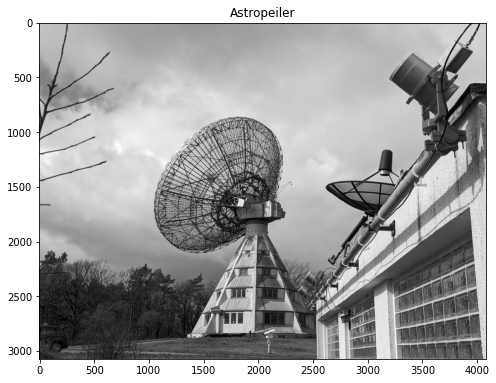

In [5]:
fig = plt.figure(figsize=(8,8))
plt.title('Astropeiler')
img0plot = plt.imshow(gastro)
img0plot.set_cmap('gray')
plt.savefig('Astropeiler.png',dpi=200,bbox_inches='tight')

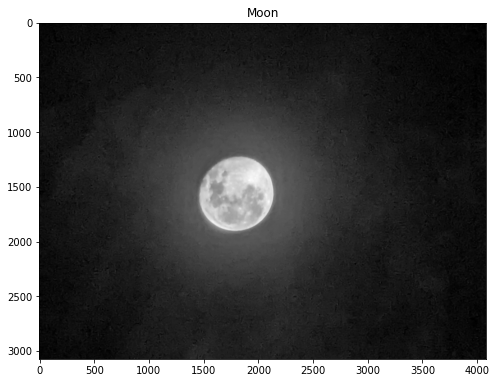

In [6]:
fig = plt.figure(figsize=(8,8))
plt.title('Moon')
img1plot = plt.imshow(gmoon)
img1plot.set_cmap('gray')
plt.savefig('Moon.png',dpi=200,bbox_inches='tight')

<ipython-input-7-9eeb895c95c7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


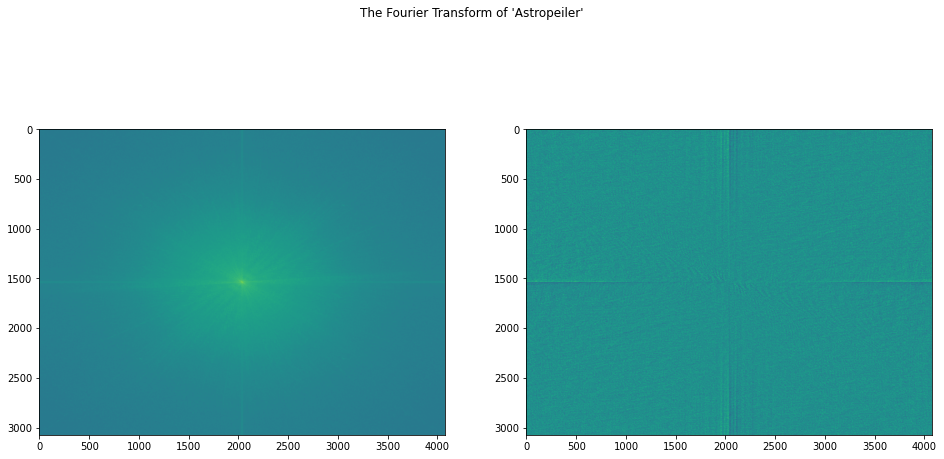

In [7]:
fftastro = np.fft.fftshift(np.fft.fft2(gastro))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of \'Astropeiler\'')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftastro))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow( np.angle(fftastro))
plt.savefig('Astropeiler_FFT.png',dpi=200,bbox_inches='tight')

<ipython-input-8-63e58ff67c28>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


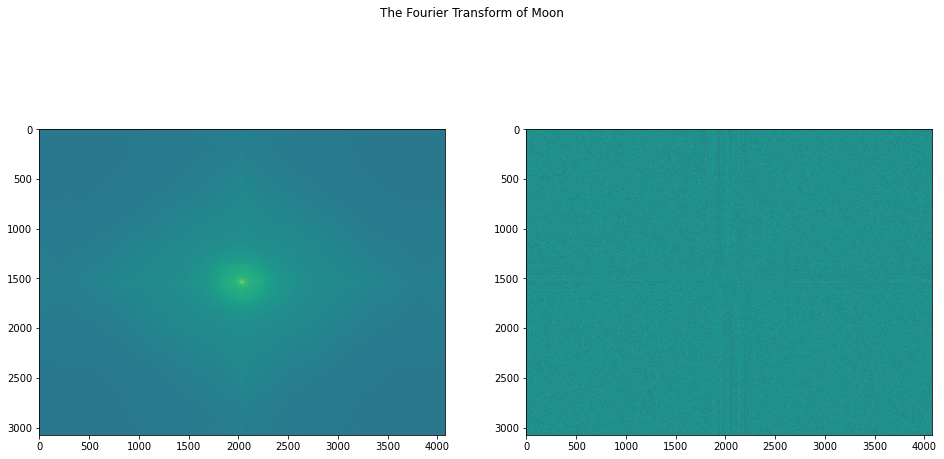

In [8]:
fftmoon = np.fft.fftshift(np.fft.fft2(gmoon))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of Moon')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftmoon))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow(np.angle(fftmoon))
plt.savefig('Moon_FFT.png',dpi=200,bbox_inches='tight')

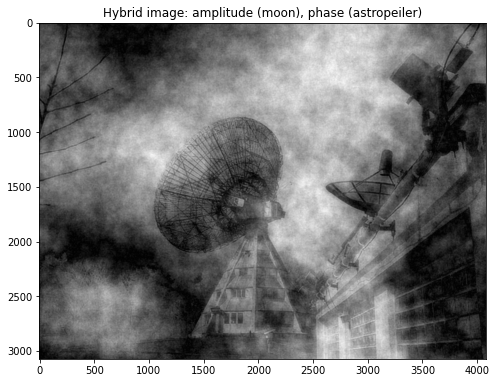

In [9]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (moon), phase (astropeiler)')
phs = np.angle(fftastro) #phase of the duck
amp = np.abs(fftmoon) #amplitude of the painting
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a duck and amplitude of the painting
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
plt.savefig('Hybrid.png',dpi=200,bbox_inches='tight')

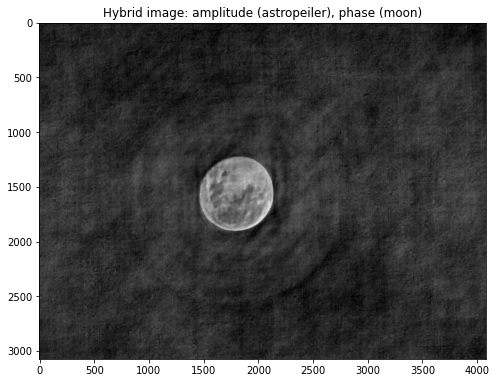

In [10]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (astropeiler), phase (moon)')
phs = np.angle(fftmoon) #phase of the painting
amp = np.abs(fftastro) #amplitude of the duck
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a painting and amplitude of the duck
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')

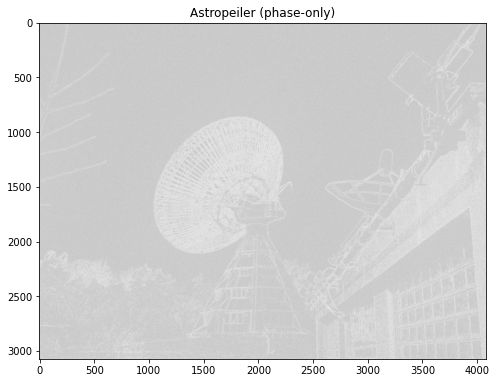

In [11]:
ig = plt.figure(figsize=(8,8))
plt.title('Astropeiler (phase-only)')
phs = np.angle(fftastro)
amp = 1.*np.ones_like(fftastro) #set all the amplitude values to 1
fftPhsImg0 = amp * (np.cos(phs) + 1j * np.sin(phs))
phsImg0 = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftPhsImg0))))
phsImg0Plot = plt.imshow(phsImg0)
phsImg0Plot.set_cmap('gray')

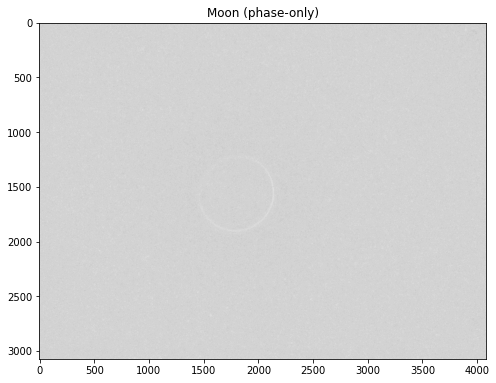

In [12]:
ig = plt.figure(figsize=(8,8))
plt.title('Moon (phase-only)')
phs = np.angle(fftmoon)
amp = 1.*np.ones_like(fftmoon) #set all the amplitude values to 1
fftPhsImg0 = amp * (np.cos(phs) + 1j * np.sin(phs))
phsImg0 = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftPhsImg0))))
phsImg0Plot = plt.imshow(phsImg0)
phsImg0Plot.set_cmap('gray')

<ipython-input-13-7d0fdfe3522d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


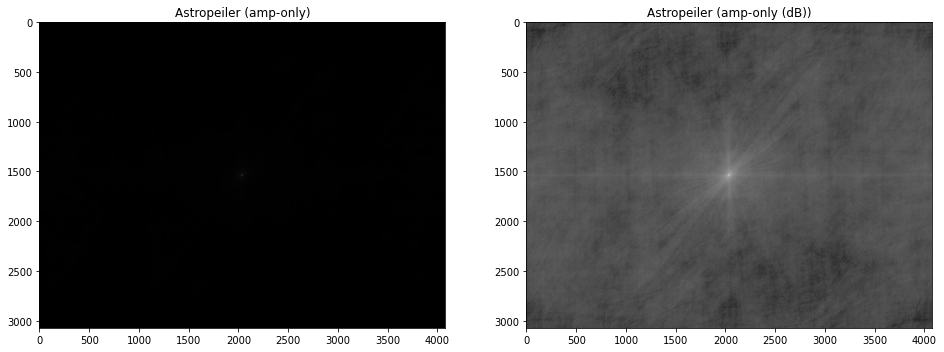

In [13]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Astropeiler (amplitude-only)')
phs = np.zeros_like(fftastro) #set the phase information to 0
amp = np.abs(fftastro)
fftAmpImg0 = amp

plt.subplot(1,2,1)
plt.title('Astropeiler (amp-only)')
ampImg0 = np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0)))
ampImg0Plot = plt.imshow(ampImg0)
ampImg0Plot.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Astropeiler (amp-only (dB))')
ampImg0deci = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))))
ampImg0deciPlot = plt.imshow(ampImg0deci)
ampImg0deciPlot.set_cmap('gray')

<ipython-input-14-c3d607326e05>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


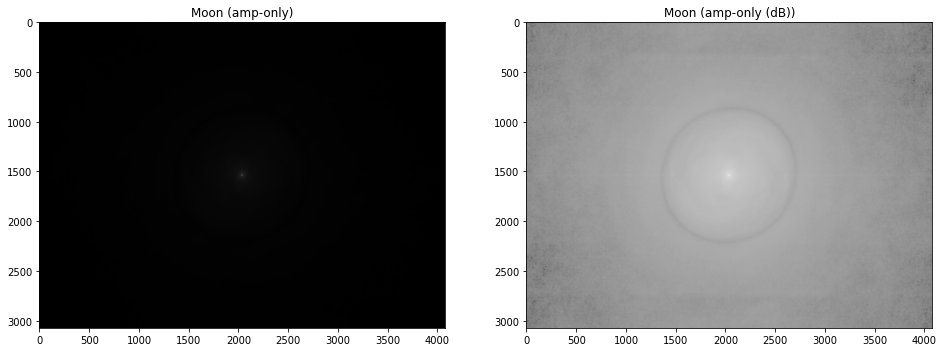

In [14]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Moon (amplitude-only)')
phs = np.zeros_like(fftmoon) #set the phase information to 0
amp = np.abs(fftmoon)
fftAmpImg0 = amp

plt.subplot(1,2,1)
plt.title('Moon (amp-only)')
ampImg0 = np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0)))
ampImg0Plot = plt.imshow(ampImg0)
ampImg0Plot.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Moon (amp-only (dB))')
ampImg0deci = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))))
ampImg0deciPlot = plt.imshow(ampImg0deci)
ampImg0deciPlot.set_cmap('gray')

<ipython-input-15-9b6f1a4c6d31>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


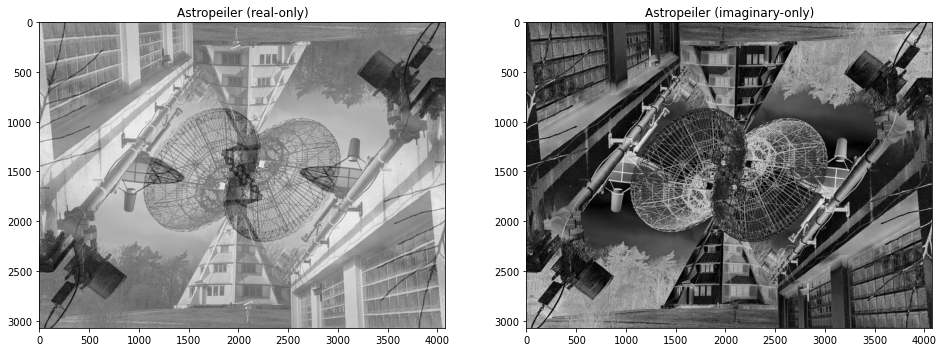

In [15]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Astropeiler (real-only)')
fftRealImg1 = fftastro.real
realImg1 = np.abs(np.fft.ifft2(fftRealImg1))
plt.imshow(realImg1)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Astropeiler (imaginary-only)')
fftImagImg1 = 1j * fftastro.imag
imagImg1 = np.abs(np.fft.ifft2(fftImagImg1))
plt.imshow(imagImg1)
plt.set_cmap('gray')

plt.savefig('Real_and_Imag.png',dpi=200,bbox_inches='tight')

<ipython-input-16-3b3ef8f2de8b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


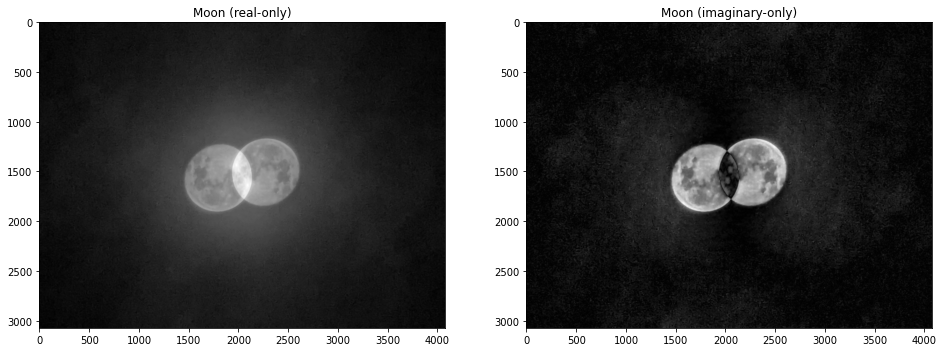

In [16]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Moon (real-only)')
fftRealImg1 = fftmoon.real
realImg1 = np.abs(np.fft.ifft2(fftRealImg1))
plt.imshow(realImg1)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Moon (imaginary-only)')
fftImagImg1 = 1j * fftmoon.imag
imagImg1 = np.abs(np.fft.ifft2(fftImagImg1))
plt.imshow(imagImg1)
plt.set_cmap('gray')

<ipython-input-17-2dc996edd4b8>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


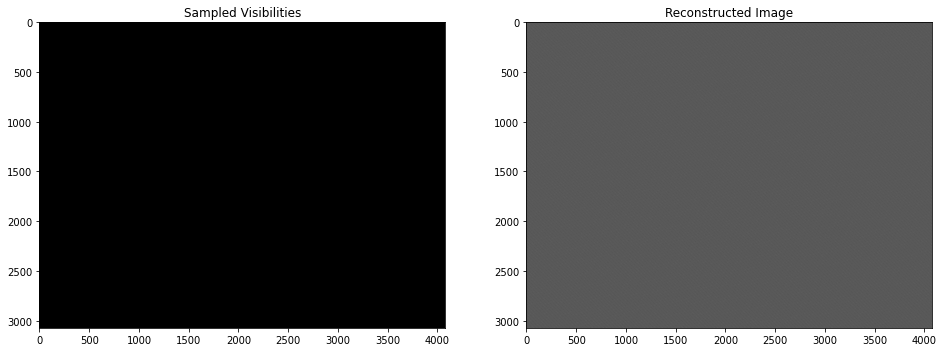

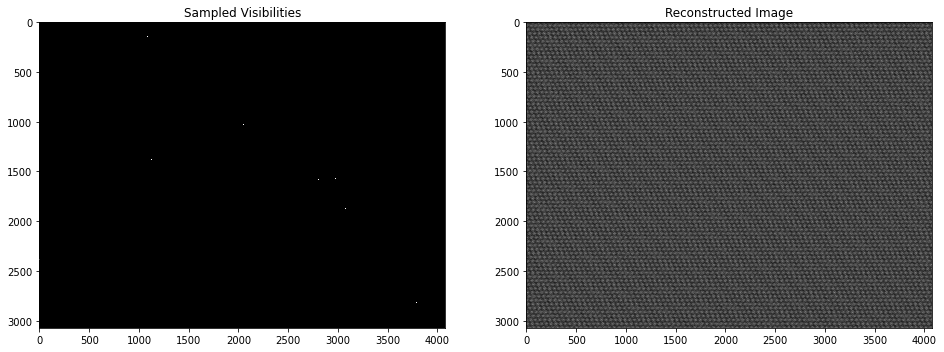

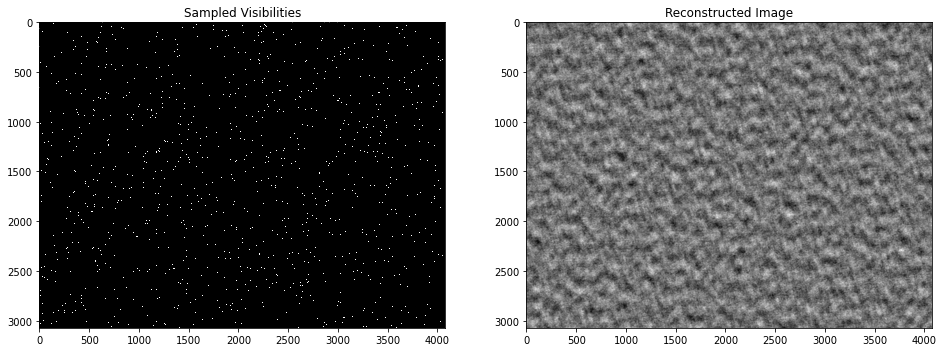

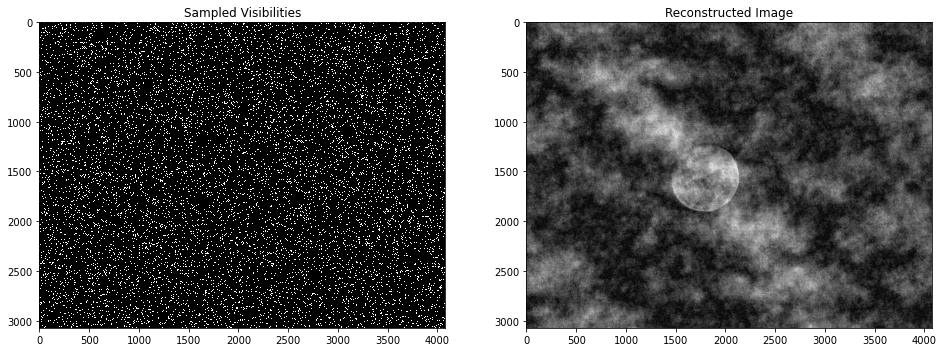

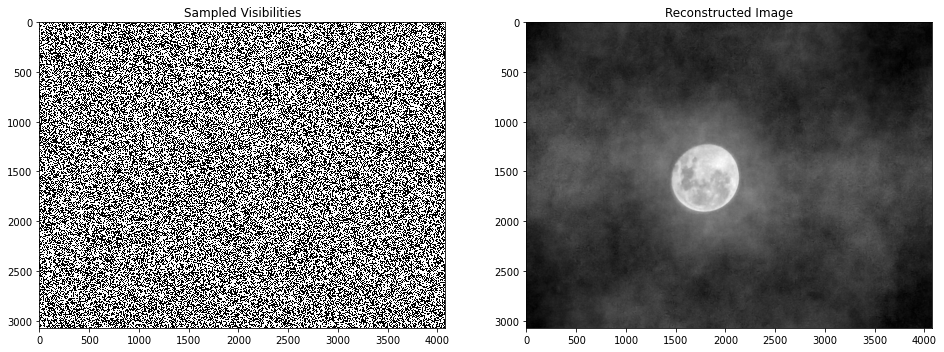

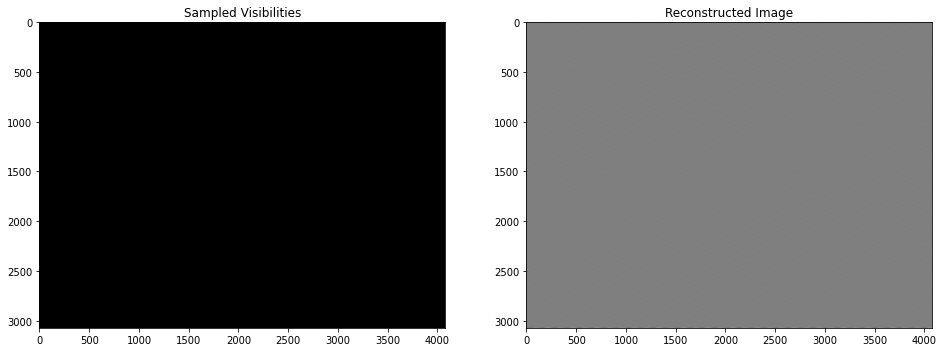

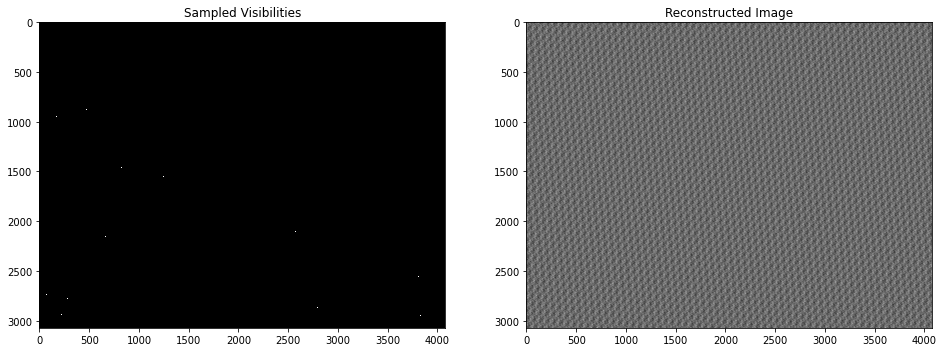

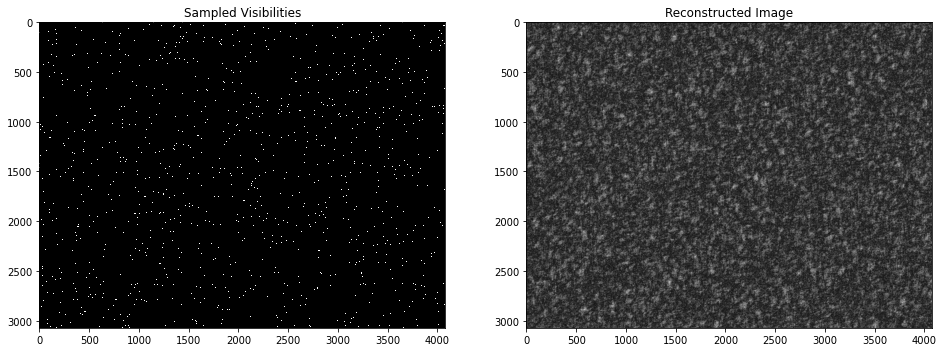

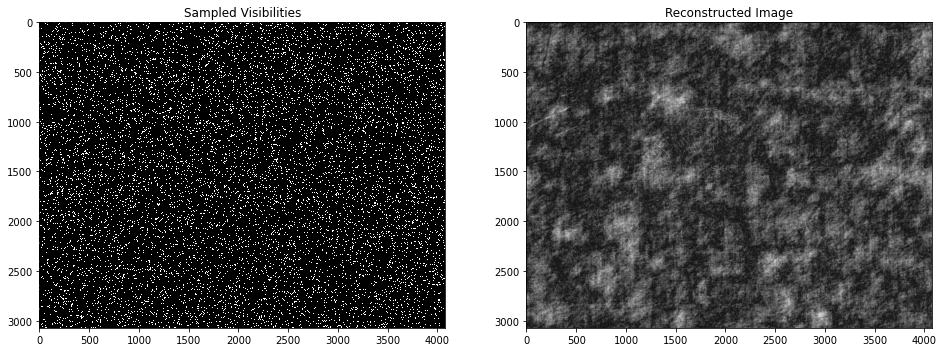

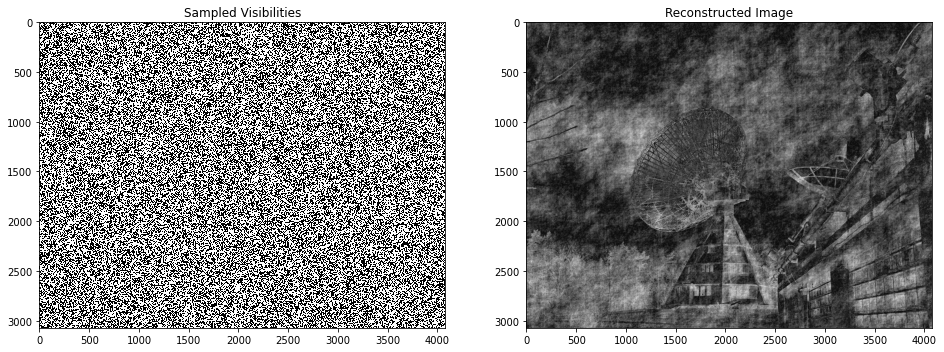

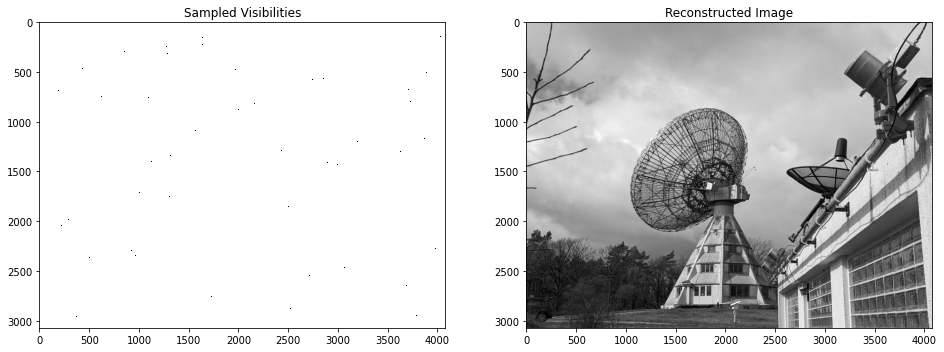

In [17]:
def reconstructImage(vis, nsamples):
    """randomly select a few values from the spatial frequency (visibility) domain
    and reconstruct the image with those samples. To do a full reconstruction of the
    image, nsamples needs to be larger than the total number of pixels in the image
    because the np.random.randint() chooses with replacement so positions will be
    doubles counted"""
    subVis = np.zeros_like(vis)
    ypos = np.random.randint(0, vis.shape[0]-1, size=nsamples)
    xpos = np.random.randint(0, vis.shape[1]-1, size=nsamples)
    subVis[ypos, xpos] = vis[ypos, xpos] #insert a subset of visibilities
    newImg = np.abs(np.fft.ifft2(np.fft.fftshift(subVis)))
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Sampled Visibilities')
    plt.imshow(np.abs(subVis).astype(bool), interpolation='nearest')
    plt.set_cmap('gray')
    
    plt.subplot(1,2,2)
    plt.title('Reconstructed Image')
    plt.imshow(newImg)
    plt.set_cmap('gray')
    

reconstructImage(fftmoon, int(1e1))

reconstructImage(fftmoon, int(1e3))

reconstructImage(fftmoon, int(1e5))

reconstructImage(fftmoon, int(1e6))

reconstructImage(fftmoon, int(1e7))

reconstructImage(fftastro, int(1e1))

reconstructImage(fftastro, int(1e3))

reconstructImage(fftastro, int(1e5))

reconstructImage(fftastro, int(1e6))

reconstructImage(fftastro, int(1e7))

reconstructImage(fftastro, int(1e8))